In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.datasets import california_housing

In [11]:
calihousing = california_housing.fetch_california_housing()

In [12]:
data = pd.DataFrame(calihousing.data,columns=calihousing.feature_names)
target = calihousing.target
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.25, random_state=42)

In [14]:
X_train = X_train[['MedInc','AveBedrms','AveRooms','HouseAge','AveOccup']]
X_traincols=X_train.columns
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [15]:
X_train = pd.DataFrame(X_train,columns=X_traincols)

In [16]:
X_test = X_test[['MedInc','AveBedrms','AveRooms','HouseAge','AveOccup']]
X_testcols=X_test.columns

X_test = scaler.transform(X_test)


X_test = pd.DataFrame(X_test,columns=X_testcols)

In [17]:
def Generate_Features_AndIntercept(data):
    
    ##we will add a constant to our dataset
    x0 = np.ones(len(data.iloc[:,0]))
    data['constant'] = x0
    
    X = np.array(data)
    B = np.array(np.zeros(data.shape[1]))
    
    print(B)
    return (X,B)

In [18]:
X,B = Generate_Features_AndIntercept(X_train)

[0. 0. 0. 0. 0. 0.]


In [19]:
def cost_function(X,Y,B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [20]:
initial_cost = cost_function(X_train,y_train,B)
initial_cost

2.810329762050178

In [21]:
def gradient_descent(X,target,B,alpha,iterations):
    lossy = []
    cost_history =[0] * iterations
    
    m = len(target)
    
    Y=target

    
    for iteration in range(iterations):

        h = X.dot(B)
        
        loss = h-Y
        
      
        gradient = X.T.dot(loss) / m

        B = B - alpha * gradient
        
        
        #New Cost Value
        cost = cost_function(X, Y, B)
        
        
        lossy.append(tuple([iteration,cost]))
        cost_history[iteration] = cost
        
    steploss = pd.DataFrame(lossy,columns=['step','loss'])
    return B, cost_history,steploss

In [22]:
y_train

array([2.285, 2.799, 1.83 , ..., 2.221, 2.835, 3.25 ])

In [23]:
coefficients, cost_history, steploss= gradient_descent(X_train, y_train, B, 0.001, 1000)

In [24]:
import seaborn as sns
np.array(coefficients)

array([ 0.49573025, -0.04470311,  0.06758333,  0.10425947, -0.02111036,
        1.30909109])

//anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


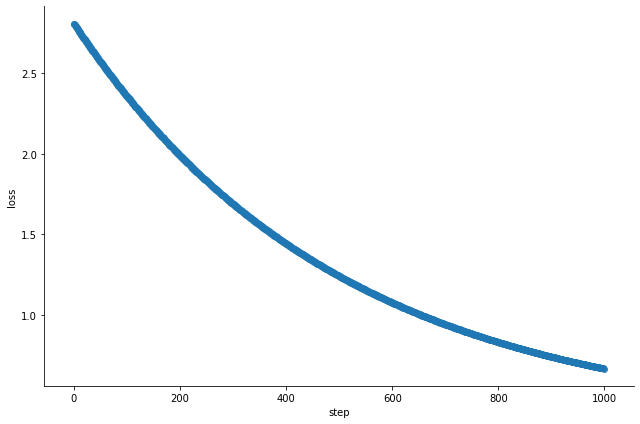

In [25]:

sns.lmplot(data=steploss,x='step',y='loss',fit_reg=False,size=6,aspect=1.5)

In [ ]:
def Generate_Features_Xtest(data):
    
    ##we will add a constant to our dataset
    x0 = np.ones(len(data.iloc[:,0]))
    data['constant'] = x0
    
    X = np.array(data)
    
    return (X)


X_test = Generate_Features_Xtest(X_test)

In [ ]:
def predict(X,coefficients):
    prediciton = X.dot(coefficients)
    return prediciton

In [ ]:
Y_pred = predict(X_test,coefficients)

In [ ]:
scores = pd.DataFrame({'Prediction':Y_pred,'YTest':y_test})

In [ ]:
scores['MSE'] = (scores['Prediction']-scores['YTest'])**2

In [ ]:
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [ ]:
r2 = r2_score(y_test,Y_pred)
r2

In [ ]:
adjstedR2 = ((1-r2)*(data.shape[0]-1))/(data.shape[0]-data.shape[1]-1)
adjstedR2

In [ ]:
scores['Residuals'] = scores['Prediction']-scores['YTest']

In [ ]:
plt.scatter(scores['Prediction'],scores['Residuals'])